------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------

# Porter: Neural Networks Regression
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------

# Defining Problem Statement & import data

## Problem Statement

Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the country's $40 billion intra-city logistics market, Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. Currently, the company has serviced 5+ million customers

Porter works with a wide range of restaurants for delivering their items directly to the people.

Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.

This dataset has the required data to train a regression model that will do the delivery time estimation, based on all those features


## Datasets

Data Source: https://drive.google.com/uc?id=1WFa46c7_uSZ6GSzgYrDk4TKJd3y9zv8f

## Data Dictionary

Each row in this file corresponds to one unique delivery. Each column corresponds to a feature as explained below.

- market_id : integer id for the market where the restaurant lies
- created_at : the timestamp at which the order was placed
- actual_delivery_time : the timestamp when the order was delivered
- store_primary_category : category for the restaurant
- order_protocol : integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, pre booked, third part etc)
- total_items subtotal : final price of the order
- num_distinct_items : the number of distinct items in the order
- min_item_price : price of the cheapest item in the order
- max_item_price : price of the costliest item in order
- total_onshift_partners : number of delivery partners on duty at the time order was placed
- total_busy_partners : number of delivery partners attending to other tasks
- total_outstanding_orders : total number of orders to be fulfilled at the moment
- estimated_store_to_consumer_driving_duration : estimated driving time in minutes taken by driver 


-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------


# Approach to case study Solution

*   Load the data and understand the features
*   Feature engineering creating target variable(time taken for each order)
*   Cleaning the data and visualization
*   Preparing the data for training
*   Random forest regression
*   Neural network regression
*   Comarision of both ways



-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------

In [81]:
#!pip install tensorflow
#!pip install category_encoders

## Importing Libraries

In [1]:
#for reding and handling the data
import pandas as pd
import numpy as np
import os
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 100


#for visualizing and analyzing it
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')

# supress warnings
import warnings 
warnings.filterwarnings('ignore')


#data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

#random forest model training
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error as sk_mape
from sklearn.ensemble import RandomForestRegressor

#Ann training
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.losses import MeanAbsolutePercentageError


from tensorflow.keras.metrics import  mean_absolute_percentage_error
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.optimizers import SGD, Adam
 
print(f'TensorFlow Version: {tf. __version__}')

TensorFlow Version: 2.12.0


## Importing data

In [2]:
df=pd.read_csv("C:\\Users\\z003u8jb\\Jupyter Notebooks\\Porter_DeliveryTimeEstimation\\data.csv")
print('-'*50)
print(f'Shape of Data : {df.shape}')
print('-'*50)
df.sample(100).head()

--------------------------------------------------
Shape of Data : (175777, 14)
--------------------------------------------------


,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
122372,1,08-02-2015 23:57,09-02-2015 00:35,55,3,2,1973,2,599,1099,15,10,10,350
78576,3,07-02-2015 02:47,07-02-2015 03:21,61,5,1,825,1,625,625,19,18,22,126
31289,1,06-02-2015 03:07,06-02-2015 03:45,10,3,2,3398,1,1699,1699,64,61,68,386
121809,1,08-02-2015 03:54,08-02-2015 04:49,55,3,3,2907,3,499,1329,60,58,75,816
39763,4,09-02-2015 00:09,09-02-2015 00:54,55,5,1,3600,1,3600,3600,40,35,45,563


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   market_id                                     175777 non-null  int64 
 1   created_at                                    175777 non-null  object
 2   actual_delivery_time                          175777 non-null  object
 3   store_primary_category                        175777 non-null  int64 
 4   order_protocol                                175777 non-null  int64 
 5   total_items                                   175777 non-null  int64 
 6   subtotal                                      175777 non-null  int64 
 7   num_distinct_items                            175777 non-null  int64 
 8   min_item_price                                175777 non-null  int64 
 9   max_item_price                                175777 non-nu

In [4]:
#Dropping Duplicate values
df = df.drop_duplicates(keep='last')

In [5]:
#Checking for null values
df.isna().sum()

#No Null values present in data

market_id                                       0
created_at                                      0
actual_delivery_time                            0
store_primary_category                          0
order_protocol                                  0
total_items                                     0
subtotal                                        0
num_distinct_items                              0
min_item_price                                  0
max_item_price                                  0
total_onshift_dashers                           0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_store_to_consumer_driving_duration    0
dtype: int64

## Preprocessing & Feature Creation

In [6]:
#Setting datetime format for respective columns
df['created_at']= pd.to_datetime(df['created_at'], dayfirst=True)
df['actual_delivery_time']= pd.to_datetime(df['actual_delivery_time'], dayfirst=True)

#Creating new features from Date Time
df['hour']=df['created_at'].dt.hour
df['day']=df['created_at'].dt.dayofweek

#Creating Target Variable & converting it to number of minutes
df['time_taken']=df['actual_delivery_time']-df['created_at']
df['time_taken_mins']=pd.to_timedelta(df['time_taken'])/pd.Timedelta('60s')

#Dropping the columns that are no longer required
df.drop(['time_taken','created_at','actual_delivery_time'],axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175776 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     175776 non-null  int64  
 1   store_primary_category                        175776 non-null  int64  
 2   order_protocol                                175776 non-null  int64  
 3   total_items                                   175776 non-null  int64  
 4   subtotal                                      175776 non-null  int64  
 5   num_distinct_items                            175776 non-null  int64  
 6   min_item_price                                175776 non-null  int64  
 7   max_item_price                                175776 non-null  int64  
 8   total_onshift_dashers                         175776 non-null  int64  
 9   total_busy_dashers                            175776 

In [8]:
df.sample(100).head(3)

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,hour,day,time_taken_mins
113149,1,45,3,2,1900,1,950,950,11,11,17,866,23,2,56.0
548,3,46,1,6,3844,5,49,879,6,6,7,448,0,3,50.0
7131,1,58,3,2,2945,2,950,1550,7,7,8,856,1,2,60.0


## Outlier Detection & Removal

In [67]:
df.describe(include = np.number, percentiles=[.25,.5,.75,.90,.95, .99, .999]).round(2).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,99.9%,max
market_id,175776.0,2.74,1.33,1.0,2.00,2.0,4.0,5.0,5.0,5.0,6.00,6.0
store_primary_category,175776.0,35.89,20.73,0.0,18.00,38.0,55.0,61.0,68.0,72.0,72.00,72.0
order_protocol,175776.0,2.91,1.51,1.0,1.00,3.0,4.0,5.0,5.0,5.0,6.00,7.0
total_items,175776.0,3.20,2.67,1.0,2.00,3.0,4.0,6.0,7.0,12.0,25.00,411.0
subtotal,175776.0,2697.12,1828.55,0.0,1412.00,2224.0,3410.0,4970.0,6250.0,9460.0,13189.58,26800.0
num_distinct_items,175776.0,2.68,1.63,1.0,1.00,2.0,3.0,5.0,6.0,8.0,12.00,20.0
min_item_price,175776.0,684.97,519.88,-86.0,299.00,595.0,942.0,1295.0,1580.0,2500.0,4248.00,14700.0
max_item_price,175776.0,1160.16,560.83,0.0,799.00,1095.0,1395.0,1795.0,2100.0,3100.0,4965.00,14700.0
total_onshift_dashers,175776.0,44.92,34.54,-4.0,17.00,37.0,66.0,98.0,115.0,136.0,153.00,171.0
total_busy_dashers,175776.0,41.86,32.17,-5.0,15.00,35.0,63.0,90.0,105.0,126.0,142.00,154.0


In [9]:
#Removing Outliers using LOF technique
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor()
df['outlier_flag'] = lof.fit_predict(df)

In [10]:
print('-'*50)
print(f'Shape of Data : {df.shape}')
print(f'Number of non-outliers: {len(df.loc[df.outlier_flag == 1])}')
print(f'Number of Outliers: {len(df.loc[df.outlier_flag == -1])}')
print('-'*50)

--------------------------------------------------
Shape of Data : (175776, 16)
Number of non-outliers: 174945
Number of Outliers: 831
--------------------------------------------------


In [11]:
#Removing outliers from data
df = df.loc[df.outlier_flag == 1]
df.drop(['outlier_flag'],axis=1,inplace=True)

print('-'*50)
print(f'Shape of Data : {df.shape}')
print('-'*50)

--------------------------------------------------
Shape of Data : (174945, 15)
--------------------------------------------------


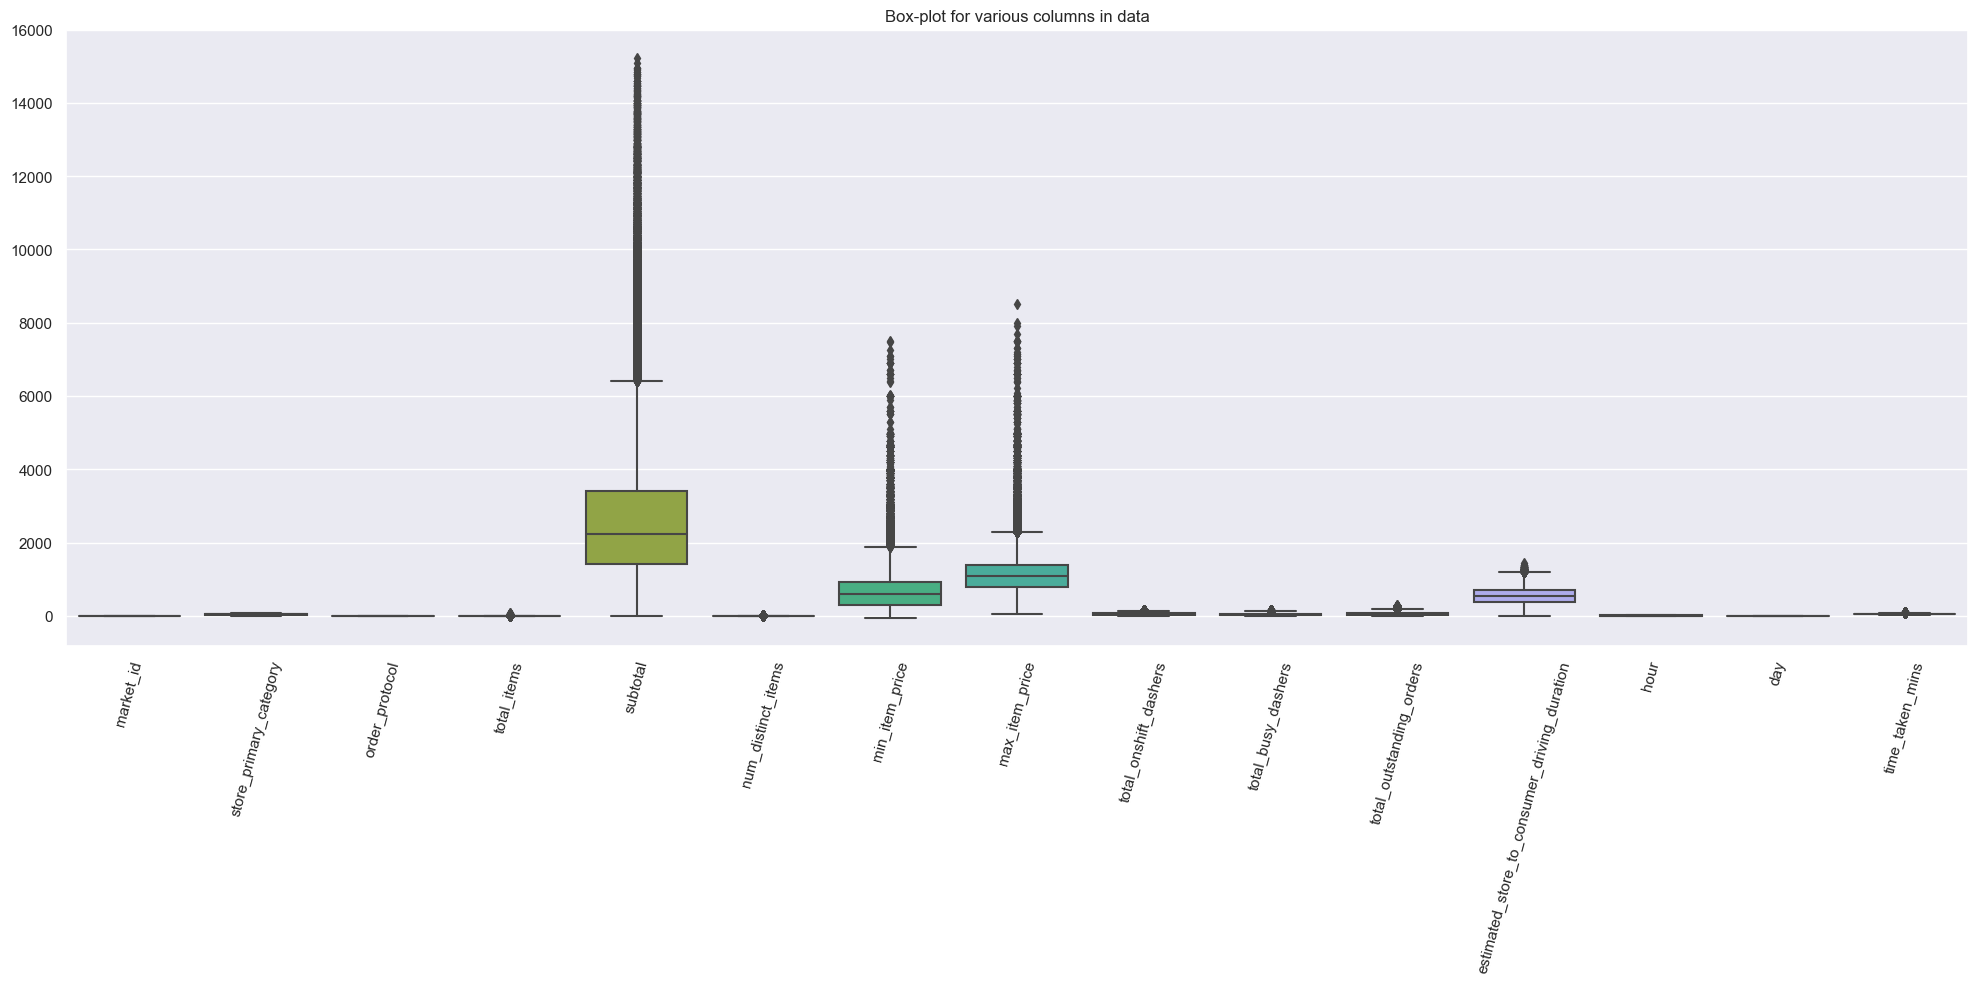

In [71]:
plt.figure(figsize=(20,7))
sns.boxplot(data=df)
plt.title("Box-plot for various columns in data")
plt.tight_layout()
plt.xticks(rotation=75)
plt.show()

# Univariate & Bivariate Analysis

----------------------------------------------------------------------
Univariate Analysis - Histograms of Continuous Variables
----------------------------------------------------------------------


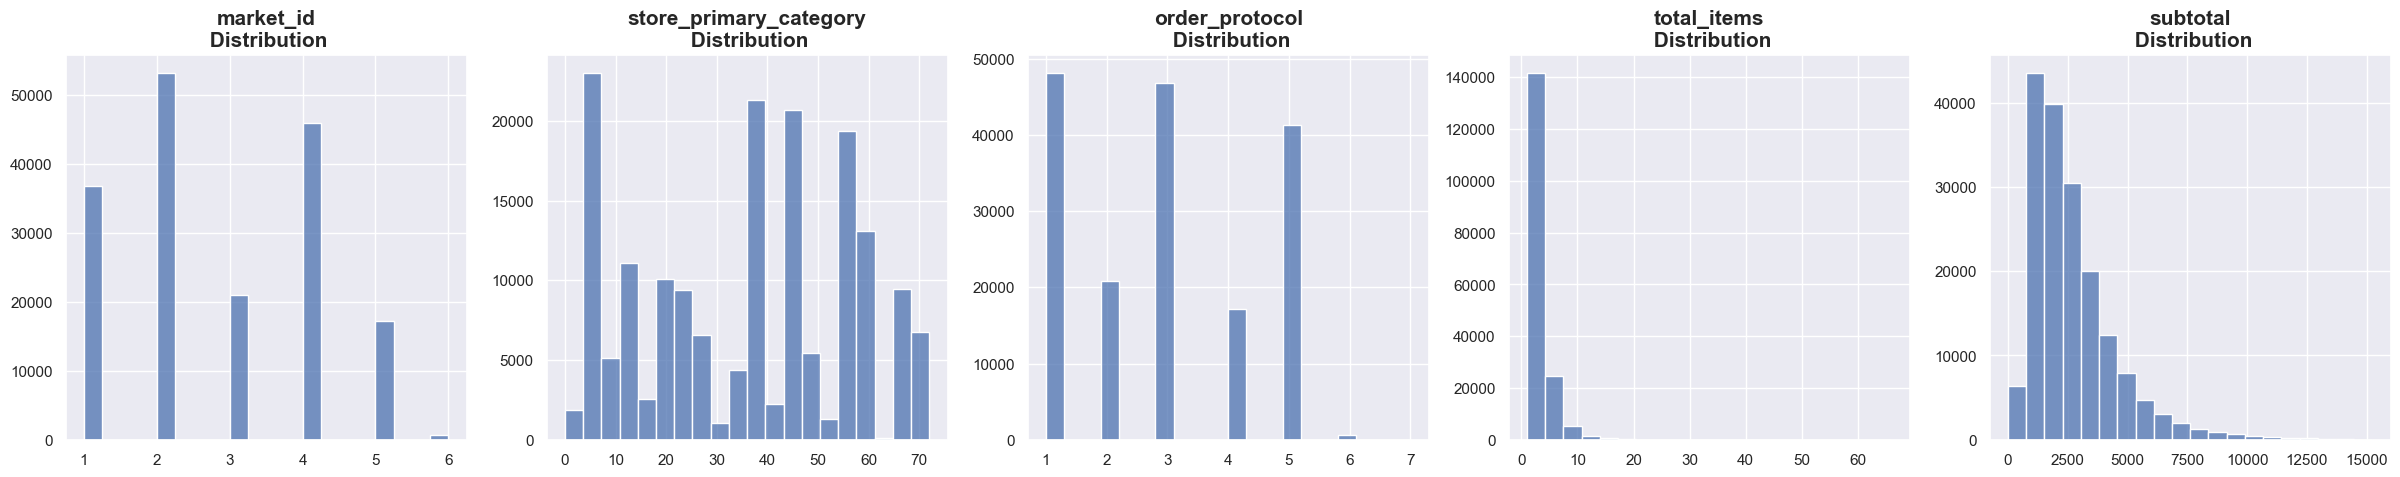

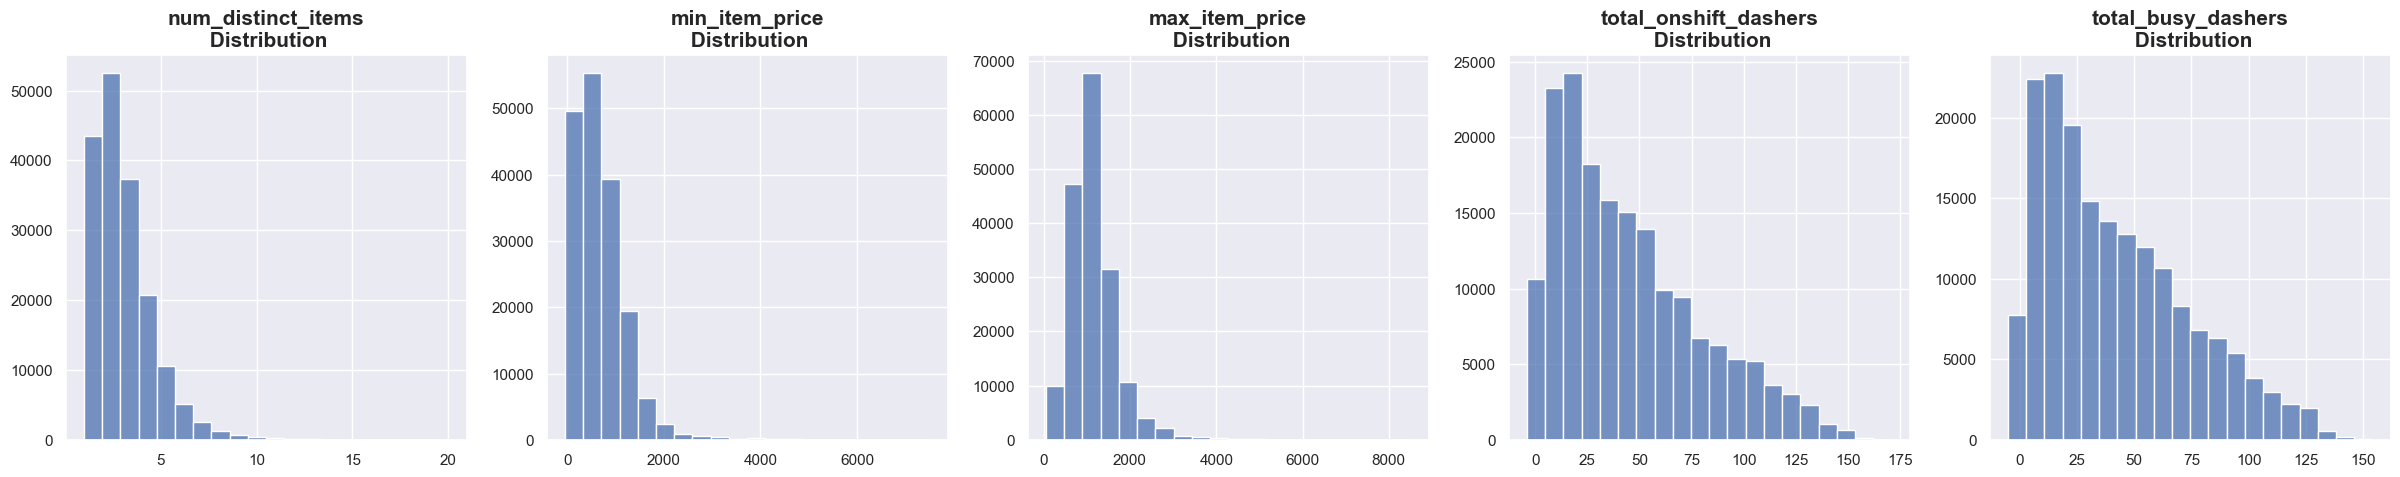

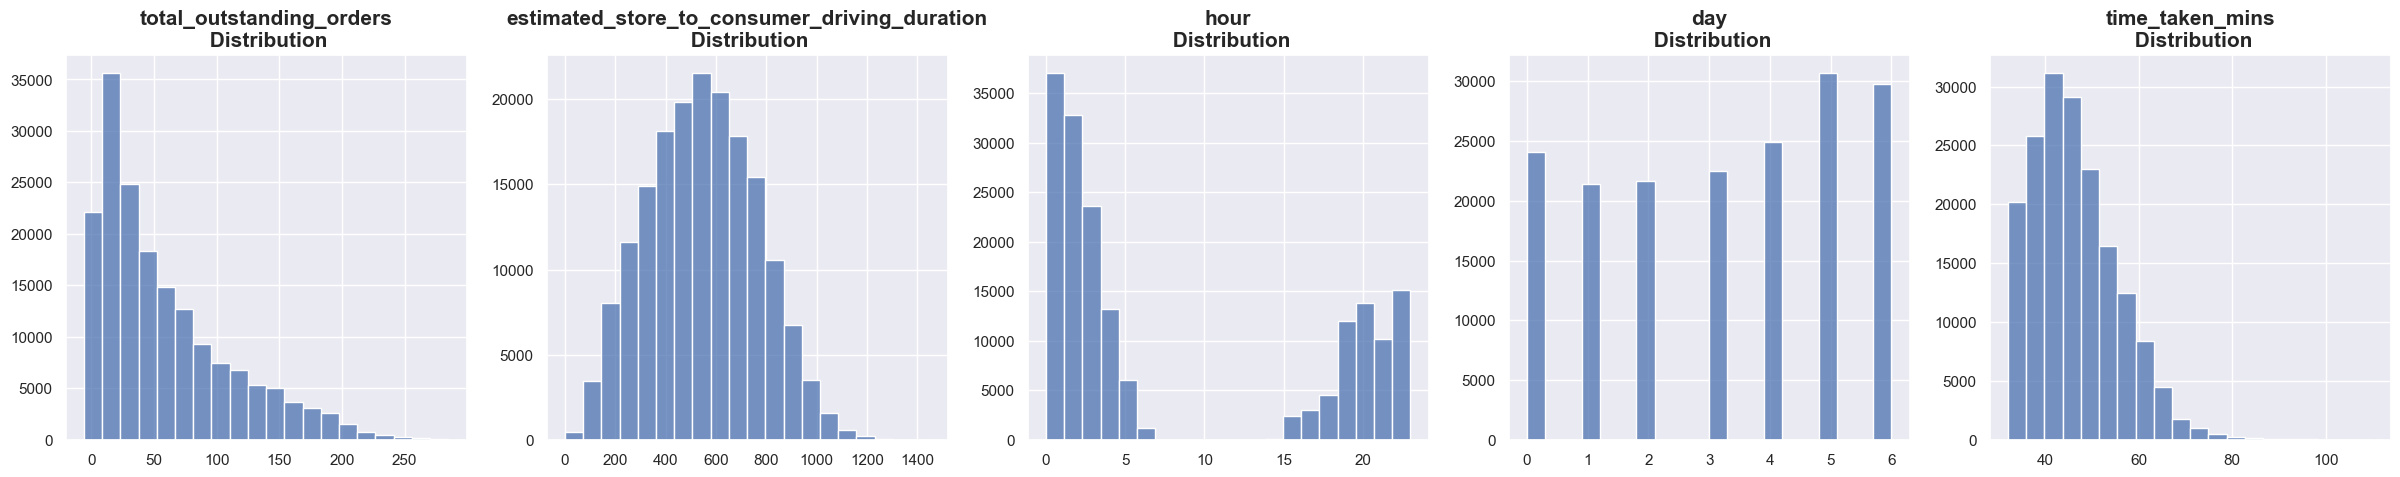

In [72]:
#Creating Histogram for all Continuous variable Columns in dataset

print('-'*70)
print('Univariate Analysis - Histograms of Continuous Variables')
print('-'*70)

num_cols = 5
start = 0
end = start + num_cols

for j in range(3):
    columns = df.columns[start:end]
    plt.figure(figsize=(30,5))
    for index, column in enumerate(columns):
        plt.subplot(1,len(columns),index+1)
        sns.histplot(x=column, data=df, bins = 20)
        plt.ylabel('')
        plt.xlabel('')
        plt.title(column + '\n Distribution', fontsize = 15, fontweight = 'bold')
    plt.show()
    start = end
    end = start + num_cols


In [74]:
#Using PairPlot to plot scatter plots for all Numerical columns 
#plt.figure(figsize=(30,30))
#sns.pairplot(df)
#plt.show()

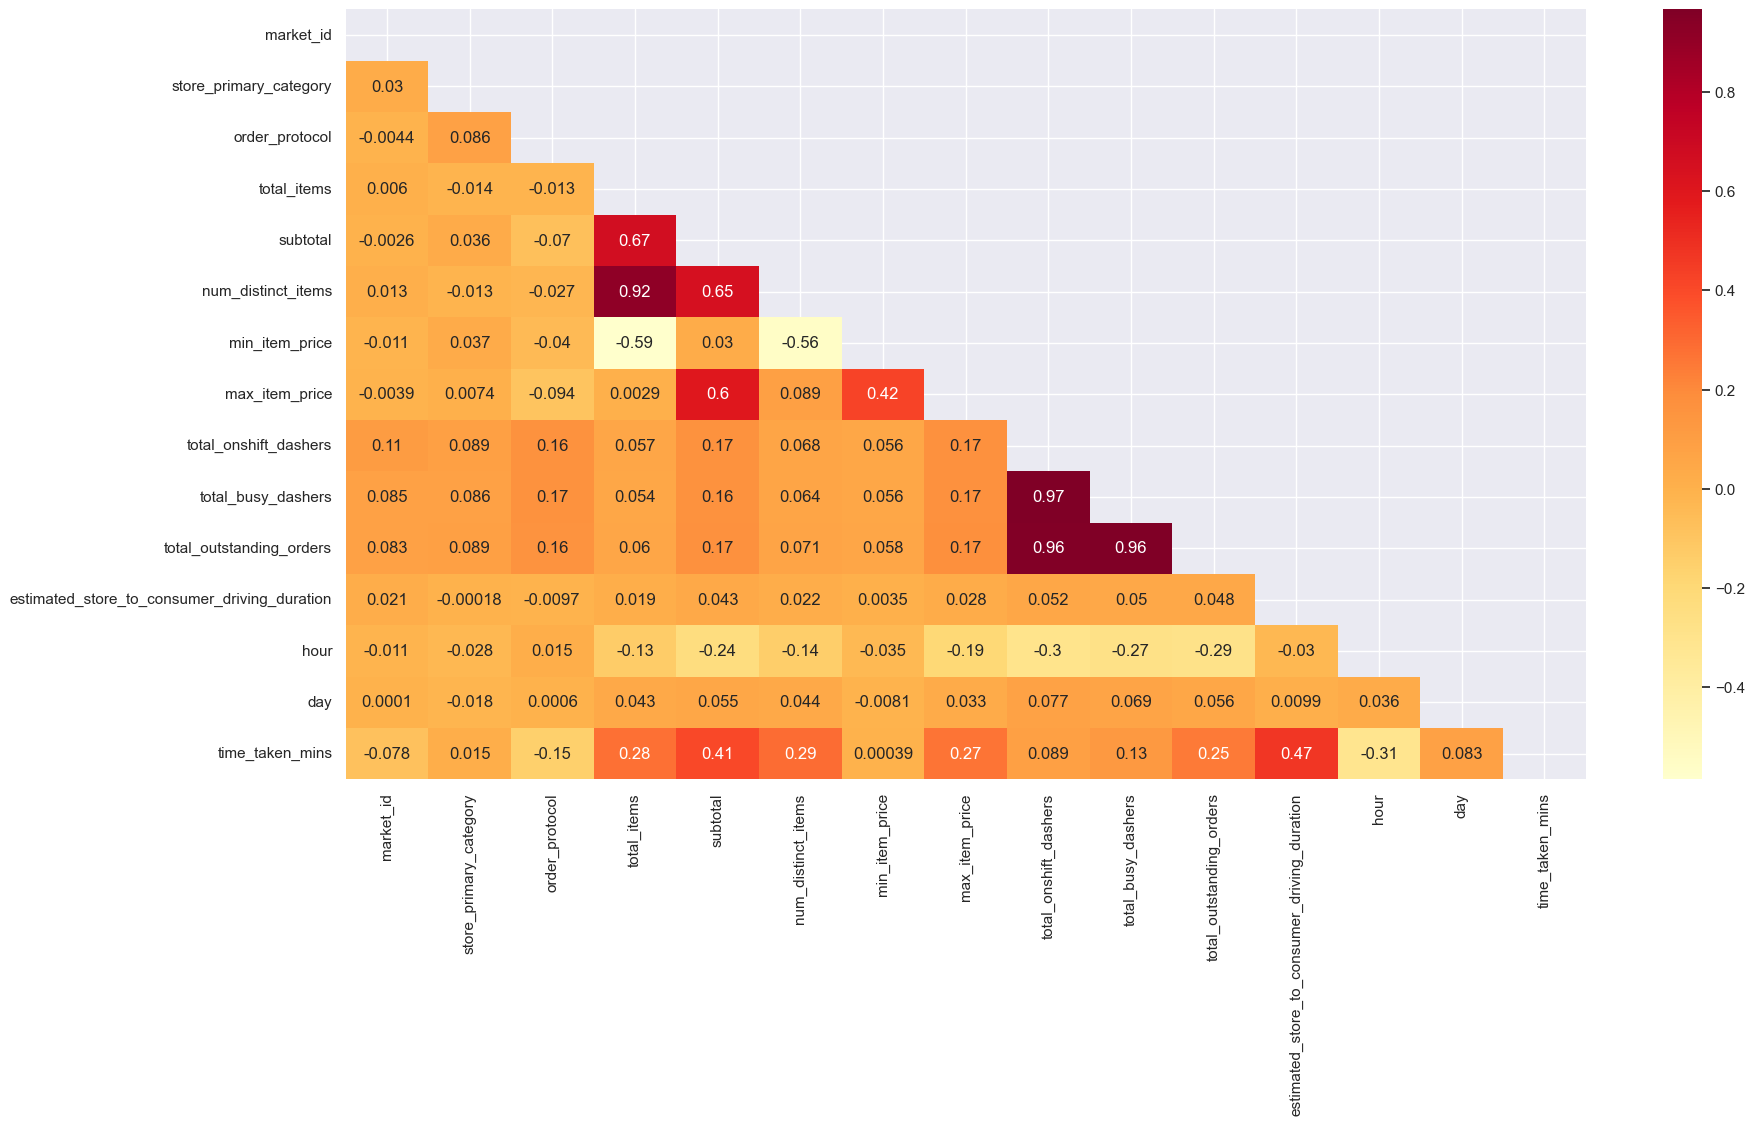

In [75]:
##Correlation Matrix
corr = df.corr(method='spearman')
mask = np.triu(corr)
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot = True, mask = mask, cmap = 'YlOrRd')
plt.show()

--------------------------------------------------------------
--------------------------------------------------------------


## Insights based on EDA:

- Based on histogram plot and detailed summary of data, majority of outliers were observed in following features:
    - total items
    - subtotal
    - min_item_price
    - max_item_price
    - estimated_store_to_consumer_driving_duration

- Obivious high Correlation observed between various features: (Total_busy_dashers vs Total_onshift_dashers), (Total_outstanding_orders & Total_onshift_dashers), ( Total_outstanding_orders, Total_busy_dashers), (Total_value , num_distinct_items) 
- Target Variable (time_taken_mins) has high correlation with following features:
    - estimated store to consumer driving duration (0.47)
    - subtotal (0.41)
    - hour (-0.31)
    - num distinct items (0.29)
    - total value (0.28)
    - max item price (0.27)




--------------------------------------------------------------
--------------------------------------------------------------

# Model Building - Random Forest

In [12]:
x = df.drop(['time_taken_mins'], axis=1)
y=df['time_taken_mins']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [13]:
%%time

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

CPU times: total: 1min 52s
Wall time: 1min 54s


RandomForestRegressor()

In [14]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [15]:
prediction = regressor.predict(X_test)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
print("mse : ", round(mse,3))
print("rmse : ",round(rmse,3))
mae = mean_absolute_error(y_test, prediction)
print('mae:' ,round(mae,3))
mape = MAPE(y_test, prediction)
print('mape:' ,round(mape,3))
print("R-squared score : ", round(r2_score(y_test, prediction),3))

mse :  3.408
rmse :  1.846
mae: 1.307
mape: 2.812
R-squared score :  0.961


## Feature Importance

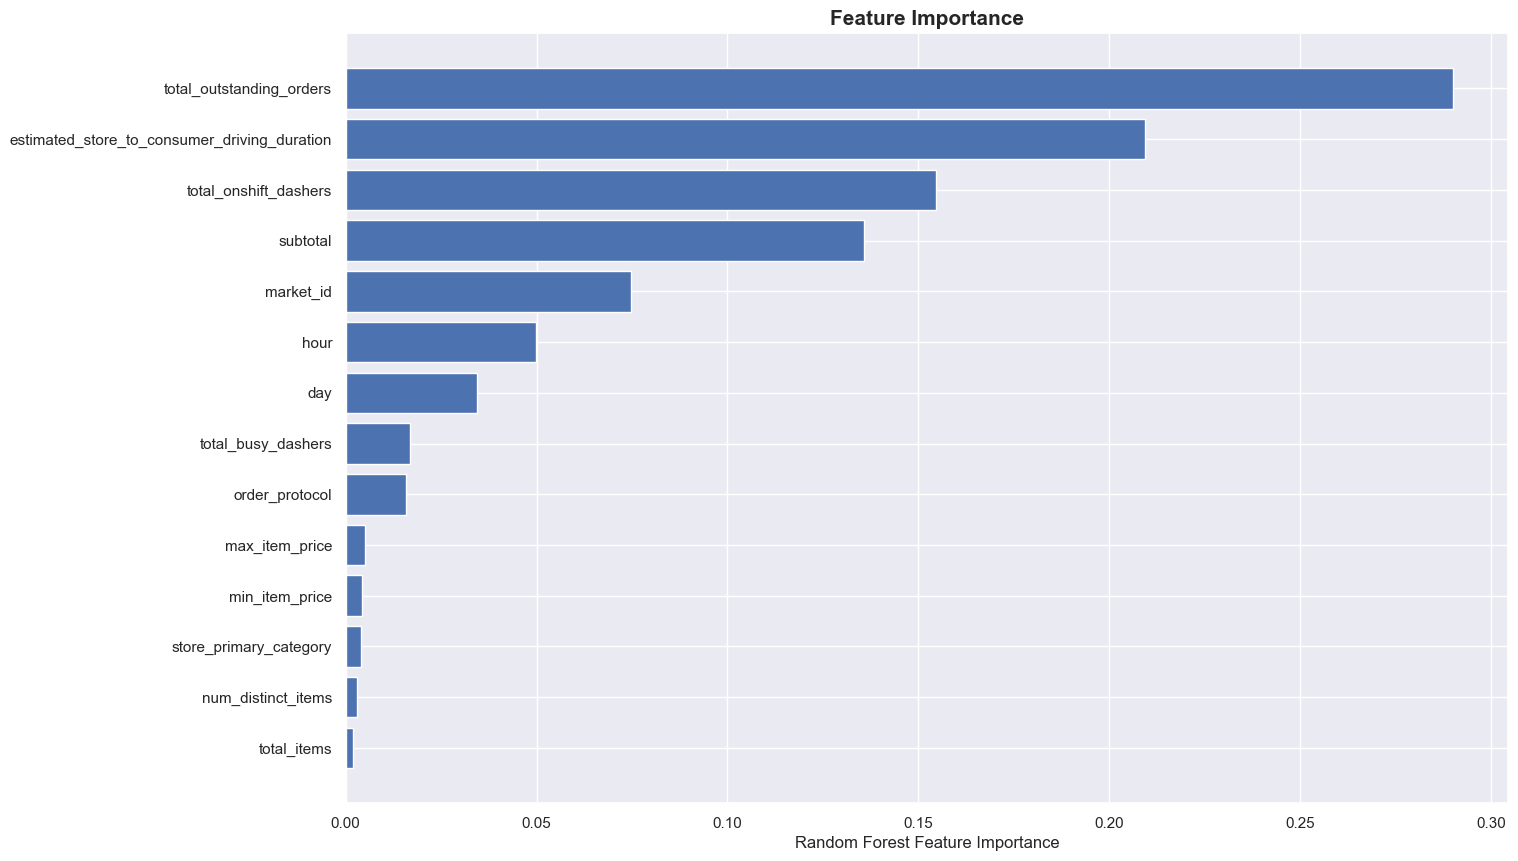

In [16]:
sorted_idx = regressor.feature_importances_.argsort()
plt.figure(figsize=(15,10))
plt.barh(df.columns[sorted_idx], regressor.feature_importances_[sorted_idx])
plt.title('Feature Importance', fontsize = 15, fontweight = 'bold')
plt.xlabel("Random Forest Feature Importance")
plt.show()

# Model Building - Neural Networks

In [29]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2,  random_state=42)

In [30]:
model = Sequential()
model.add(Dense(13,  kernel_initializer='normal', activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 13)                195       
                                                                 
 dense_11 (Dense)            (None, 128)               1792      
                                                                 
 dense_12 (Dense)            (None, 1024)              132096    
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_13 (Dense)            (None, 256)               262400    
                                                                 
 dense_14 (Dense)            (None, 1)                 257       
                                                                 
Total params: 396,740
Trainable params: 396,740
Non-tr

In [31]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("CNN_best.h5", save_best_only = True)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10, restore_best_weights = True )


adam=Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=adam, metrics=['mae'])
history=model.fit(X_train, y_train, 
                  epochs=200, verbose=1, 
                  batch_size=8000, validation_split=0.2, 
                  callbacks=[early_stop, checkpoint])

Epoch 1/200
14/14 [==============================] - 3s 132ms/step - loss: 2085.3831 - mae: 44.6807 - val_loss: 1680.9110 - val_mae: 39.9162
Epoch 2/200
14/14 [==============================] - 2s 117ms/step - loss: 772.8474 - mae: 23.8253 - val_loss: 387.9445 - val_mae: 17.1278
Epoch 3/200
14/14 [==============================] - 2s 118ms/step - loss: 213.5720 - mae: 11.6001 - val_loss: 172.0851 - val_mae: 10.1444
Epoch 4/200
14/14 [==============================] - 2s 120ms/step - loss: 117.9610 - mae: 8.5091 - val_loss: 97.8460 - val_mae: 7.9533
Epoch 5/200
14/14 [==============================] - 2s 118ms/step - loss: 86.2236 - mae: 7.1890 - val_loss: 76.0444 - val_mae: 6.8350
Epoch 6/200
14/14 [==============================] - 2s 118ms/step - loss: 71.7912 - mae: 6.6865 - val_loss: 65.9879 - val_mae: 6.2666
Epoch 7/200
14/14 [==============================] - 2s 120ms/step - loss: 60.7888 - mae: 6.1232 - val_loss: 55.6964 - val_mae: 5.8172
Epoch 8/200
14/14 [=====================

Epoch 62/200
14/14 [==============================] - 2s 126ms/step - loss: 3.3524 - mae: 1.3878 - val_loss: 2.2993 - val_mae: 1.1268
Epoch 63/200
14/14 [==============================] - 2s 129ms/step - loss: 3.2957 - mae: 1.3752 - val_loss: 2.2500 - val_mae: 1.1170
Epoch 64/200
14/14 [==============================] - 2s 126ms/step - loss: 3.2524 - mae: 1.3664 - val_loss: 2.1844 - val_mae: 1.0963
Epoch 65/200
14/14 [==============================] - 2s 130ms/step - loss: 3.2034 - mae: 1.3567 - val_loss: 2.1381 - val_mae: 1.0856
Epoch 66/200
14/14 [==============================] - 2s 132ms/step - loss: 3.1222 - mae: 1.3390 - val_loss: 2.0642 - val_mae: 1.0622
Epoch 67/200
14/14 [==============================] - 2s 132ms/step - loss: 3.0803 - mae: 1.3279 - val_loss: 2.0137 - val_mae: 1.0497
Epoch 68/200
14/14 [==============================] - 2s 136ms/step - loss: 3.0230 - mae: 1.3195 - val_loss: 1.9549 - val_mae: 1.0334
Epoch 69/200
14/14 [==============================] - 2s 133ms

Epoch 123/200
14/14 [==============================] - 2s 133ms/step - loss: 1.4251 - mae: 0.9283 - val_loss: 0.4758 - val_mae: 0.5131
Epoch 124/200
14/14 [==============================] - 2s 133ms/step - loss: 1.4023 - mae: 0.9242 - val_loss: 0.4733 - val_mae: 0.5199
Epoch 125/200
14/14 [==============================] - 2s 129ms/step - loss: 1.3766 - mae: 0.9140 - val_loss: 0.4463 - val_mae: 0.5012
Epoch 126/200
14/14 [==============================] - 2s 126ms/step - loss: 1.3606 - mae: 0.9075 - val_loss: 0.4561 - val_mae: 0.5071
Epoch 127/200
14/14 [==============================] - 2s 123ms/step - loss: 1.3555 - mae: 0.9058 - val_loss: 0.4573 - val_mae: 0.5165
Epoch 128/200
14/14 [==============================] - 2s 126ms/step - loss: 1.3817 - mae: 0.9184 - val_loss: 0.4700 - val_mae: 0.5266
Epoch 129/200
14/14 [==============================] - 2s 132ms/step - loss: 1.3488 - mae: 0.9063 - val_loss: 0.4208 - val_mae: 0.4877
Epoch 130/200
14/14 [==============================] - 

Epoch 184/200
14/14 [==============================] - 2s 126ms/step - loss: 1.1841 - mae: 0.8562 - val_loss: 0.2815 - val_mae: 0.4130
Epoch 185/200
14/14 [==============================] - 2s 128ms/step - loss: 1.1226 - mae: 0.8307 - val_loss: 0.3016 - val_mae: 0.4348
Epoch 186/200
14/14 [==============================] - 2s 141ms/step - loss: 1.1105 - mae: 0.8274 - val_loss: 0.2186 - val_mae: 0.3599
Epoch 187/200
14/14 [==============================] - 2s 129ms/step - loss: 1.1020 - mae: 0.8233 - val_loss: 0.2431 - val_mae: 0.3833
Epoch 188/200
14/14 [==============================] - 2s 139ms/step - loss: 1.1322 - mae: 0.8355 - val_loss: 0.2340 - val_mae: 0.3748
Epoch 189/200
14/14 [==============================] - 2s 146ms/step - loss: 1.0936 - mae: 0.8218 - val_loss: 0.2210 - val_mae: 0.3644
Epoch 190/200
14/14 [==============================] - 2s 145ms/step - loss: 1.0865 - mae: 0.8184 - val_loss: 0.2138 - val_mae: 0.3572
Epoch 191/200
14/14 [==============================] - 

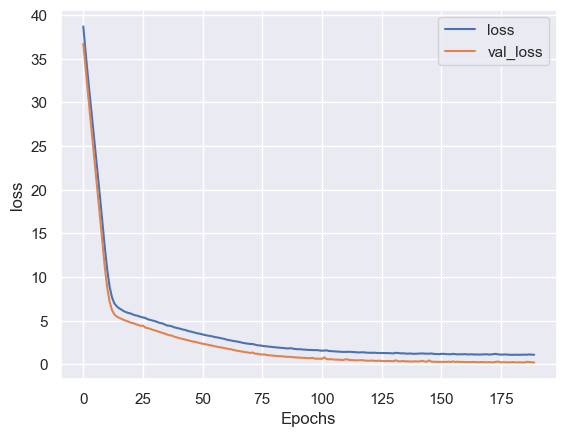

In [37]:
def plot_history(history, key):
  plt.plot(history.history[key][10:])
  plt.plot(history.history['val_'+key][10:])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()


# Plot the history
plot_history(history, 'loss')

In [38]:
prediction = model.predict(X_test)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
mae = mean_absolute_error(y_test, prediction)

print("mse : ", round(mse,3))
print("rmse : ",round(rmse,3))
print('mae:' ,round(mae,3))
print("mape: ",round((sk_mape(y_test, prediction))*100,3))
print("R-squared score : ", round(r2_score(y_test, prediction),3))

1094/1094 [==============================] - 3s 3ms/step
mse :  0.209
rmse :  0.457
mae: 0.357
mape:  0.801
R-squared score :  0.998


# Comparison between Neural Network Model & Random Forest Regressor

- In our case **Neural Network model has significantly out-performed Random Forest regressor** for the data given in this case study and hyperparameter chose by me.
    - **MAE for RandomForest regressor 1.307 was and MAE for Neural Network model was 0.357**
    - Train Time for Neural Network was significantly higher.
    - Time to predict was also higher in case of Neural Network model.
    - From business perspective, **MAE (from Random Forest Regressor) of ~1.3 mins is good enough. Hence both models will suffice the business expectations.**
    
- In general, neural network models have been shown to be more accurate than random forest regressors for solving various problems. This is likely due to the fact that neural networks are able to learn more complex relationships between the input features and the output variable.

- Feature importance graph from Random forest regressor suggest that following features have higher significance in predicting delivery time:
    - **Total Outstanding orders**
    - **Estimated store to consumer driving duration**
    - **Total Onshift dashers**
    - **Subtotal of order**
    - **Market id**
    - **Hour of the day**
    - **Day of week**


---------------------------------------------------------------------------------------------

## Questions from Case Study:

-------------------------------------------------------------------------

**Defining the problem statements and where can this and modifications of this be used?**
- Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.
- Delivery time estimation can be use case for varieties of companies specially online food delivery platforms (e.g. Swiggy, Zomato, ONDC) and groceries delivery platforms (e.g. Blinkit, BigBasket, Dunzo). Essentially all intra-city deliveries are extension of this problem statement. 

-------------------------------------------------------------------------


**List 3 functions the pandas datetime provides with one line explanation.**
- pd.to_datetime(): Converts a string or other object to a datetime object.
- pd.datetime().dt.hour : attribute returns the hour of the day.
- pd.datetime().dt.dayofweek : attribute returns the day of week.

-------------------------------------------------------------------------

**Short note on datetime, timedelta, time span (period)**
- **datetime:** A datetime object represents a specific date and time. It can be created using the datetime() function, which takes a year, month, day, hour, minute, second, and microsecond as arguments. 
- **timedelta:** A timedelta object represents a duration of time. It can be created using the timedelta() function, which takes a number of seconds, minutes, hours, days, weeks, months, or years as arguments.
- **time span (period):** A time span (period) is a range of time. It can be represented by a pair of datetime objects, or by a datetime object and a timedelta object.

-------------------------------------------------------------------------

**Why do we need to check for outliers in our data?**
- Outliers are data points that are significantly different from the rest of the data. They can be caused by a number of factors, such as errors in data entry, outliers can skew the results of statistical analyses and make it difficult to draw accurate conclusions from the data.

- Here are some of the reasons why it is important to check for outliers in your data:

    - **Outliers can skew the results of statistical analyses.** When outliers are present, they can have a significant impact on the results of statistical analyses, such as mean, median, and standard deviation. This is because outliers can pull the mean, median, and standard deviation away from the rest of the data. As a result, the results of the statistical analysis may not be accurate.
    - **Outliers can make it difficult to draw accurate conclusions from the data.** When outliers are present, it can be difficult to draw accurate conclusions from the data. This is because outliers can distort the distribution of the data and make it difficult to see the underlying patterns. As a result, it can be difficult to determine what the data is actually telling you.
    - **Outliers can be caused by errors in data entry.** Outliers can also be caused by errors in data entry. For example, if a data entry clerk accidentally enters a value that is much larger or smaller than the rest of the data, this can create an outlier. As a result, it is important to check for outliers before you analyze your data.

-------------------------------------------------------------------------

**Name 3 outlier removal methods?**
- There are a number of ways to check for outliers in your data. Some common methods include:

    - **Visual inspection:** One way to check for outliers is to visually inspect your data. This can be done by plotting your data on a chart or graph. If you see any data points that are significantly different from the rest of the data, these may be outliers.
    - **Statistical tests:** There are a number of statistical tests that can be used to identify outliers. Some common statistical tests include the interquartile range (IQR) and the Z-score.
    - **Expert judgment:** In some cases, it may be necessary to use expert judgment to identify outliers. This is especially true if you are working with data that is complex or difficult to understand.

- Once you have identified any outliers in your data, you will need to decide what to do with them. Some common options include:

    - **Ignore the outliers:** If you believe that the outliers are caused by errors in data entry, you may choose to ignore them. However, you should only do this if you are confident that the errors are not significant.
    - **Remove the outliers:** If you believe that the outliers are not representative of the data, you may choose to remove them. However, you should only do this if you are confident that removing the outliers will not significantly impact the results of your analysis.
    - **Retain the outliers:** If you believe that the outliers are valid data points, you may choose to retain them. However, you should be aware that the presence of outliers can impact the results of your analysis.
    
- The best way to deal with outliers will depend on the specific circumstances of your data. However, it is important to check for outliers and to take steps to address them if necessary.


-------------------------------------------------------------------------

**What classical machine learning methods can we use other than random forest for regression?**
- Here are some classical machine learning methods that can be used for regression other than random forest:

    - **Linear regression:** Linear regression is a simple but powerful method that can be used to predict a continuous value from a set of independent variables. It works by fitting a line to the data, and then using the line to predict the value of the dependent variable for new data points.
    - **Decision trees:** Decision trees are a type of non-parametric regression that can be used to predict a continuous value from a set of independent variables. They work by splitting the data into smaller and smaller groups, and then predicting the value of the dependent variable for each group.
    - **Support vector machines (SVMs):** SVMs are a type of machine learning algorithm that can be used for both classification and regression tasks. They work by finding a hyperplane that separates the data into two classes, or by finding a function that minimizes the error between the predicted and actual values.
    - **Naive Bayes**: Naive Bayes is a simple but effective machine learning algorithm that can be used for both classification and regression tasks. It works by assuming that the probability of an event occurring is independent of the other events.

-------------------------------------------------------------------------

**Why is scaling required for neural networks?**
- Scaling is required for neural networks because it helps to improve the accuracy and stability of the model. When the data is not scaled, the model may not be able to learn the relationships between the features as effectively. This can lead to inaccurate predictions and unstable training.
- Here are some of the benefits of scaling data for neural networks:

    - **Improved accuracy:** Scaling can help to improve the accuracy of neural networks by making the data more consistent and easier for the model to learn.
    - **Increased stability:** Scaling can help to increase the stability of neural networks by making the model less sensitive to changes in the data.
    - **Reduced training time:** Scaling can help to reduce the training time of neural networks by making the model more efficient.
- Overall, scaling is a valuable technique that can be used to improve the performance of neural networks. If you are using neural networks to solve a problem, it is worth considering whether or not to scale your data.

-------------------------------------------------------------------------

**Briefly explain your choice of optimizer.**
- I chose the Adam optimizer because it is a popular and effective optimizer for deep learning. Adam is an adaptive learning rate method that combines the advantages of AdaGrad and RMSProp. It has been shown to be effective for a variety of tasks, including image classification, natural language processing, and speech recognition.
- Here are some of the advantages of Adam:

    - It is fast and efficient.
    - It is effective for a variety of tasks.
    - It is relatively easy to use.


-------------------------------------------------------------------------
**Which activation function did you use and why?**

- I used the ReLU activation function in my deep learning model. ReLU stands for Rectified Linear Unit. It is a non-linear activation function that is very popular in deep learning. ReLU has several advantages over other activation functions, including:

    - It is fast and efficient.
    - It is effective for a variety of tasks.
    - It is relatively easy to implement.


-------------------------------------------------------------------------
**Why does a neural network perform well on a large dataset?**
- Neural networks perform well on large datasets because they are able to learn complex relationships between input and output data. This is because neural networks have many parameters, which allows them to model a wide variety of functions. When a neural network is trained on a large dataset, it is able to learn the patterns in the data and use them to make predictions.

- Here are some of the reasons why neural networks perform well on large datasets:

    - **More data means more information.** The more data a neural network is trained on, the more information it has to learn from. This allows the neural network to learn more complex relationships between input and output data.
    - **More data means less noise.** When a neural network is trained on a large dataset, the noise in the data is averaged out. This helps the neural network to learn the underlying patterns in the data.
    - **More data means better generalization.** When a neural network is trained on a large dataset, it is able to generalize better to new data. This is because the neural network has learned the underlying patterns in the data, and it can use these patterns to make predictions on new data.

-------------------------------------------------------------------------


#  ------------------------------- END --------------------------------------